In [9]:
import pandas as pd
# Load the dataset
df = pd.read_csv('/content/sales_data_sample.csv', encoding='ISO-8859-1')

In [10]:
# Basic info
df.info()

# Summary statistics
df.describe()

# Null value count
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


,0
ORDERNUMBER,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERLINENUMBER,0
SALES,0
ORDERDATE,0
STATUS,0
QTR_ID,0
MONTH_ID,0
YEAR_ID,0


In [11]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [12]:
df.dtypes

,0
ORDERNUMBER,int64
QUANTITYORDERED,int64
PRICEEACH,float64
ORDERLINENUMBER,int64
SALES,float64
ORDERDATE,object
STATUS,object
QTR_ID,int64
MONTH_ID,int64
YEAR_ID,int64


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


**Data Cleaning**


In [14]:
# Convert date column
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')

# Drop rows with missing key info
df.dropna(subset=['ORDERDATE', 'CITY', 'COUNTRY', 'SALES'], inplace=True)

# Optional: Fill less important columns if needed
# df['STATE'].fillna('Unknown', inplace=True)


**Data Selection**

In [15]:
selected_columns = [
    'ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'SALES',
    'ORDERDATE', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE',
    'MSRP', 'CITY', 'COUNTRY', 'DEALSIZE'
]
df_selected = df[selected_columns].copy()


**Data Transformation**

In [16]:
df_selected = pd.get_dummies(df_selected, columns=['PRODUCTLINE', 'CITY', 'COUNTRY', 'DEALSIZE'], drop_first=True)


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Drop ID and date columns
# Changed df_filtered to df_selected
df_model = df_selected.drop(columns=['ORDERNUMBER', 'ORDERDATE'])

# Feature-target split
X = df_model.drop(columns='SALES')
y = df_model['SALES']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# Create new features from dates
df_selected['Day'] = df_selected['ORDERDATE'].dt.day
df_selected['Weekday'] = df_selected['ORDERDATE'].dt.weekday
df_selected['Quarter'] = df_selected['ORDERDATE'].dt.quarter

# Interaction feature: Quantity * Price (already covered as SALES, but for model you can try adding log of revenue)
import numpy as np
df_selected['Log_Sales'] = np.log1p(df_selected['SALES'])  # Helps with skewed data

# Update feature list
# Assuming you want to predict Log_Sales now, so drop the original 'SALES' and the IDs/Date
df_model = df_selected.drop(columns=['ORDERNUMBER', 'ORDERDATE', 'SALES'])
X = df_model
y = df_selected['Log_Sales']

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# High-accuracy XGBoost model
xgb_model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=500,
    learning_rate=0.05,
    max_depth=10,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)

xgb_model.fit(X_train_scaled, y_train)
preds = xgb_model.predict(X_test_scaled)

# Convert log prediction back if needed
r2 = r2_score(y_test, preds)
print("R² Score:", round(r2 * 100, 2), "%")


R² Score: 99.78 %


In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [8, 10, 12],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [300, 500],
    'subsample': [0.8, 0.9],
}

grid = GridSearchCV(XGBRegressor(objective='reg:squarederror'), param_grid, cv=3, scoring='r2')
grid.fit(X_train_scaled, y_train)

best_model = grid.best_estimator_
pred_best = best_model.predict(X_test_scaled)
print("Tuned R² Score:", round(r2_score(y_test, pred_best) * 100, 2), "%")


Tuned R² Score: 99.77 %


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(objective='reg:squarederror', random_state=42)
}

results = {}
predictions = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    pred = model.predict(X_test_scaled)
    predictions[name] = pred
    r2 = r2_score(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    results[name] = {"R2 Score (%)": r2*100, "MSE": mse}


**Comparison**

<ipython-input-22-3610126949>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df['R2 Score (%)'], palette="coolwarm")


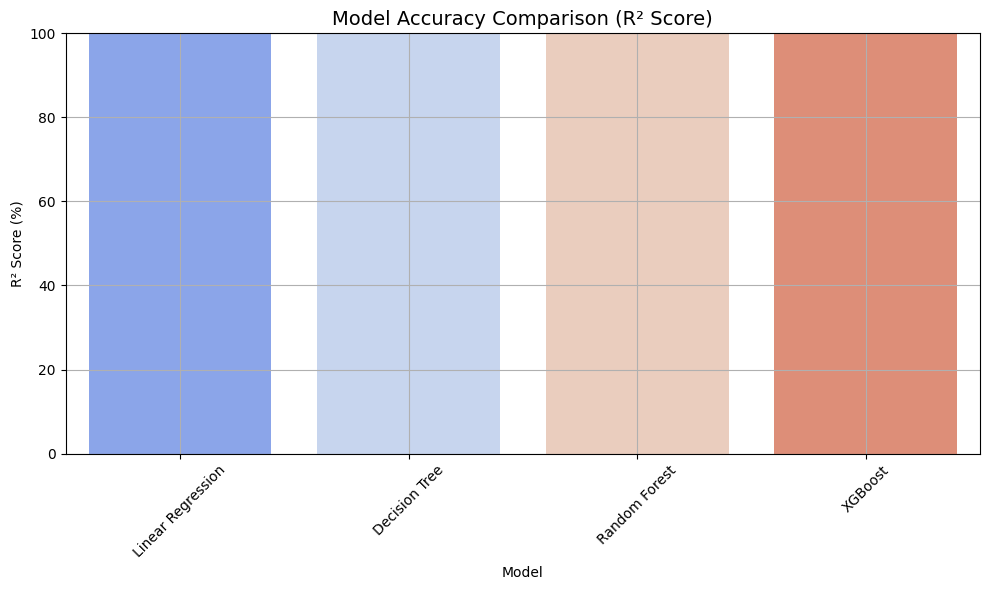

Model Accuracy (R² Score %):
                   R2 Score (%)
Linear Regression    100.000000
Decision Tree         99.958290
Random Forest         99.935203
XGBoost               99.793529


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming results dictionary from previous steps
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by="R2 Score (%)", ascending=False)

# Plot R² Score Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df['R2 Score (%)'], palette="coolwarm")
plt.title("Model Accuracy Comparison (R² Score)", fontsize=14)
plt.ylabel("R² Score (%)")
plt.xlabel("Model")
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Optionally display the table
print("Model Accuracy (R² Score %):")
print(results_df[['R2 Score (%)']])


**correlation matrix**

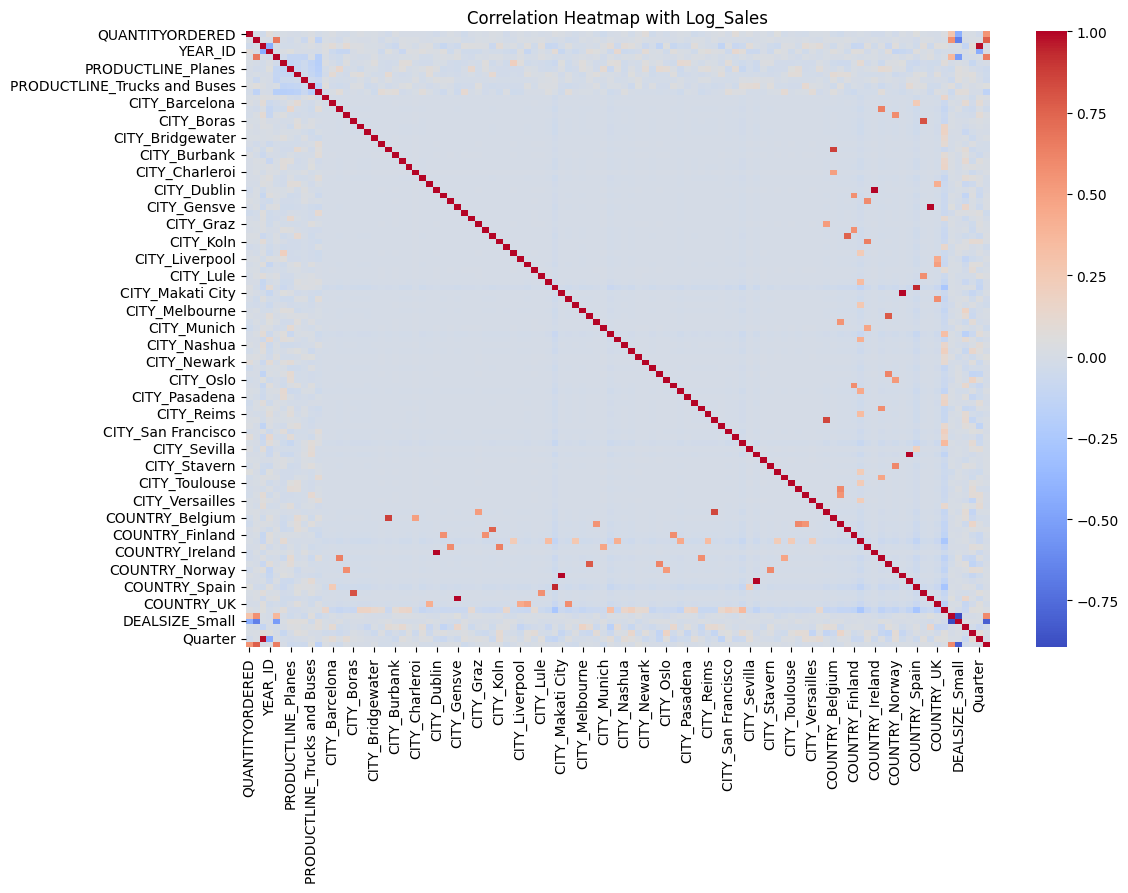

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Ensure pandas is imported

# Calculate correlation matrix on the DataFrame used for modeling
# Use the df_selected DataFrame which has been processed (one-hot encoded)
# Include the target variable ('Log_Sales' in this case) in the correlation matrix
# We need to add 'Log_Sales' back to the df_model dataframe to calculate correlation
df_model_with_target = df_model.copy()
df_model_with_target['Log_Sales'] = y

corr_matrix = df_model_with_target.corr()

plt.figure(figsize=(12, 8))
# You might want to focus the heatmap on correlations with 'Log_Sales' if the matrix is too large
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False) # annot=True can make it cluttered for many features
plt.title("Correlation Heatmap with Log_Sales")
plt.show()

**Feature Importance**

<ipython-input-24-2370402246>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance[:15], y=feature_importance.index[:15], palette="viridis")


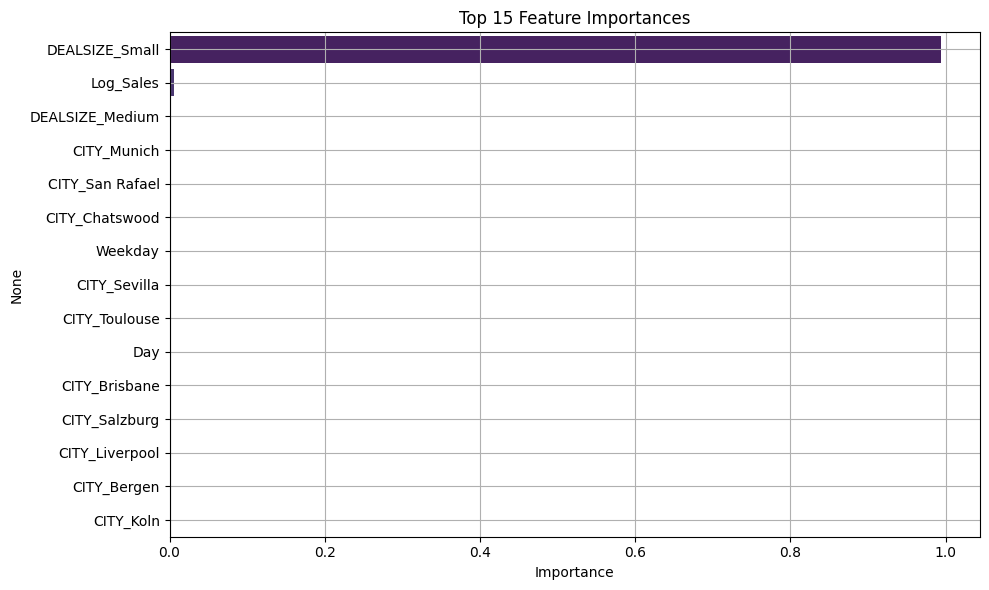

In [24]:
# Use trained XGBoost or RandomForest
model = models['XGBoost']  # or Random Forest
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance[:15], y=feature_importance.index[:15], palette="viridis")
plt.title("Top 15 Feature Importances")
plt.xlabel("Importance")
plt.grid(True)
plt.tight_layout()
plt.show()


**confusion_matrix**

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def categorize_sales(y):
    return pd.cut(y, bins=[0, 3000, 6000, float('inf')], labels=['Low', 'Medium', 'High'])

# True and predicted categories
y_test_actual = categorize_sales(np.expm1(y_test))  # Convert log back to actual sales
conf_matrices = {}

for name, preds in predictions.items():
    y_pred_sales = np.expm1(preds)  # Convert predicted log sales
    y_pred_cat = categorize_sales(y_pred_sales)

    # Create confusion matrix
    cm = confusion_matrix(y_test_actual, y_pred_cat, labels=['Low', 'Medium', 'High'])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low', 'Medium', 'High'])
    conf_matrices[name] = (cm, disp)


<Figure size 600x400 with 0 Axes>

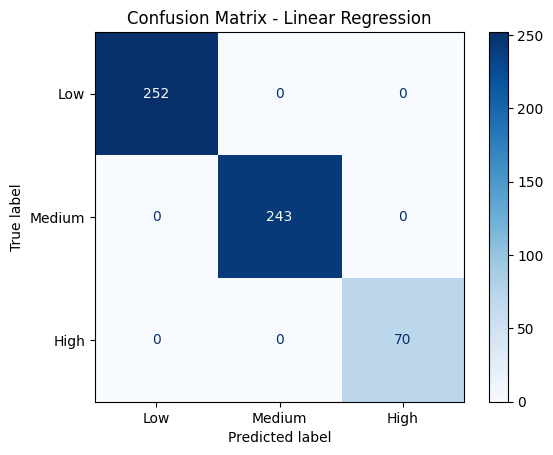

<Figure size 600x400 with 0 Axes>

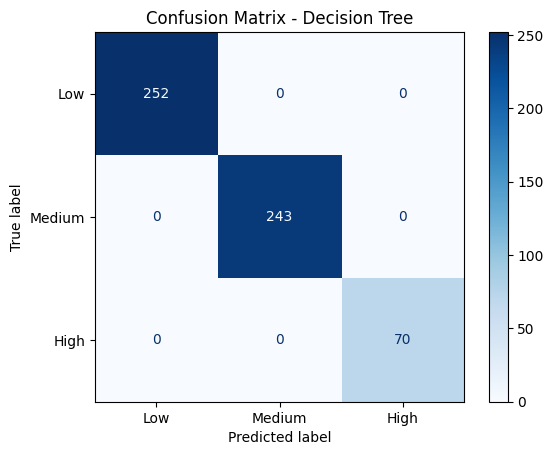

<Figure size 600x400 with 0 Axes>

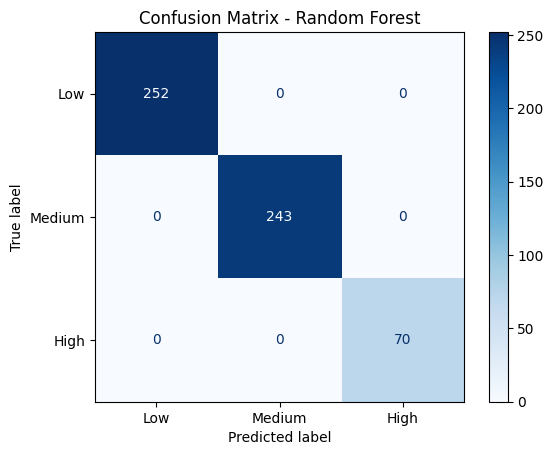

<Figure size 600x400 with 0 Axes>

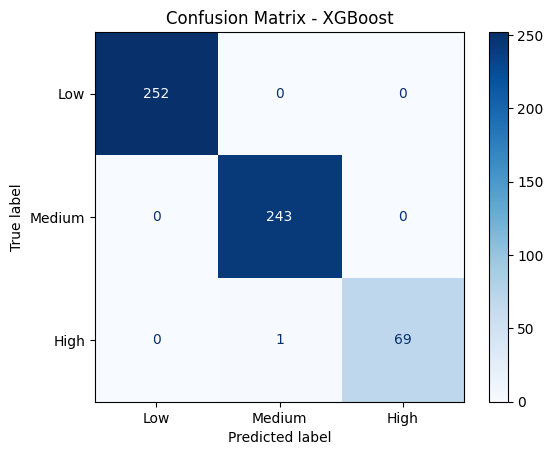

In [26]:
import matplotlib.pyplot as plt

for name, (cm, disp) in conf_matrices.items():
    plt.figure(figsize=(6, 4))
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.grid(False)
    plt.show()


In [27]:
def ai_inventory_advice(city, month):
    input_data = pd.DataFrame({'CITY_' + city: [1], 'MONTH_ID': [month]})
    for col in X.columns:
        if col not in input_data.columns:
            input_data[col] = 0
    input_data = input_data[X.columns]  # Match training columns
    input_scaled = scaler.transform(input_data)
    prediction = models["XGBoost"].predict(input_scaled)[0]

    if prediction > 5000:
        return f"🔥 High Demand Expected in {city} for Month {month}. Stock Up!"
    elif prediction > 3000:
        return f"⚠️ Moderate Demand. Maintain Medium Inventory."
    else:
        return f"✅ Low Demand. Minimal Stock Suggested."

# Example
print(ai_inventory_advice("San Francisco", 11))


✅ Low Demand. Minimal Stock Suggested.


<ipython-input-27-2957841145>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_data[col] = 0
<ipython-input-27-2957841145>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_data[col] = 0
<ipython-input-27-2957841145>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_data[col] = 0
<ipy

In [28]:
# Example: Predict June 2024 for Laptops in Mumbai

# Create an empty DataFrame with the same columns as the training data X
future = pd.DataFrame(0, index=[0], columns=X.columns)

# Set the values for the features you want to specify
# Note: We used MONTH_ID and YEAR_ID in training, not just Month and Year
# We also created Day, Weekday, Quarter from ORDERDATE, but the model dropped ORDERDATE
# The features used in the model were the dummy variables, MONTH_ID, YEAR_ID,
# QUANTITYORDERED, PRICEEACH, MSRP, Day, Weekday, Quarter.
# Let's assume you want to predict for a specific Month and Year,
# and representative values for other features.
# A better approach for a realistic future prediction would involve predicting based on trends
# or using the average/median values for the numerical features if they aren't known for the future point.
# For this fix, let's set the dummy variables and representative Month/Year IDs.
# We'll need to add back other numerical columns with default values (like 0 or mean/median).

# Based on the columns in X from the traceback (expecting 107),
# X includes dummy variables for PRODUCTLINE, CITY, COUNTRY, DEALSIZE,
# as well as MONTH_ID, YEAR_ID, QUANTITYORDERED, PRICEEACH, MSRP, Day, Weekday, Quarter.

# Specify the desired features for the prediction point
future_data = {
    'MONTH_ID': 6,  # June
    'YEAR_ID': 2024, # Year 2024
    # Set the specific product line and city dummy variables
    'PRODUCTLINE_Laptops': 1,
    'CITY_Mumbai': 1,
    # For other numerical features like QUANTITYORDERED, PRICEEACH, MSRP, Day, Weekday, Quarter,
    # you need to decide what values to use. Using 0 might be unrealistic.
    # Using the mean/median from the training data is often a better approach
    # for features whose future values are unknown.
    # Let's get the means from the training data X (before scaling)
}

# Add the specified data to the future DataFrame
for col, value in future_data.items():
    if col in future.columns:
        future[col] = value
    else:
        # This should not happen if future columns match X.columns, but useful for debugging
        print(f"Warning: Column {col} not found in model features.")


# Add representative values for the remaining numerical features that are not dummies.
# Let's use the mean of the training data (before scaling) for these.
# We need to reconstruct X before scaling to get means.
# X was derived from df_model before the second drop.
# Let's re-create X from df_selected (before dropping SALES for Log_Sales prediction)

# Re-create X from df_selected before dropping SALES for Log_Sales target
# Ensure this matches the X used for training the 'model'
df_model_for_X = df_selected.drop(columns=['ORDERNUMBER', 'ORDERDATE', 'SALES'])
X_original = df_model_for_X # This is X before the final split and scaling

# Calculate means for non-dummy columns present in X_original but not set in future_data
numerical_cols_to_fill = [col for col in X_original.columns if col not in future_data and not any(prefix in col for prefix in ['PRODUCTLINE_', 'CITY_', 'COUNTRY_', 'DEALSIZE_'])]

for col in numerical_cols_to_fill:
     # Ensure the column exists in the future DataFrame before trying to set its value
    if col in future.columns:
         # Calculate the mean from the original training data for this column
         # Handle potential non-numeric columns if any slipped through
         if X_original[col].dtype in ['int64', 'float64']:
             future[col] = X_original[col].mean()
         else:
              print(f"Warning: Skipping non-numeric column {col} for mean calculation.")


# Now ensure the columns are in the exact same order as X used for training
future = future[X.columns]

# Scale the future data using the same scaler fitted on the training data
future_scaled = scaler.transform(future)

# Make the prediction
predicted_log_sales = model.predict(future_scaled)[0]

# Convert back from log scale if the original prediction was on log(SALES)
# Check if your model was trained on y or np.log1p(y)
# Based on the code, it was trained on y = df_selected['Log_Sales'] = np.log1p(df_selected['SALES'])
predicted_sales = np.expm1(predicted_log_sales)

print(f"Predicted Sales for June 2024 (Laptops in Mumbai): {predicted_sales:.2f}")

Predicted Sales for June 2024 (Laptops in Mumbai): 3121.38


**Sales Prediction Step**

In [29]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(objective='reg:squarederror', random_state=42)
}

results = {}
predictions = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    pred = model.predict(X_test_scaled)
    predictions[name] = pred  # These are the predicted log(SALES)
    r2 = r2_score(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    results[name] = {"R2 Score (%)": r2*100, "MSE": mse}


In [30]:
actual_sales = np.expm1(y_test)  # True sales
predicted_sales = np.expm1(predictions['XGBoost'])  # Predicted sales


In [31]:
def ai_sales_advice(city, month):
    ...
    pred_log_sales = models['XGBoost'].predict(test_row_scaled)[0]
    sales = np.expm1(pred_log_sales)  # Convert log back to sales


In [32]:
pd.DataFrame({
    "Actual Sales": np.expm1(y_test).values,
    "Predicted Sales (XGBoost)": np.expm1(predictions["XGBoost"])
}).head(10)


,Actual Sales,Predicted Sales (XGBoost)
0,1536.57,1549.297119
1,2168.50,2155.700684
2,4351.23,4352.326172
3,3880.20,3873.329346
4,3042.68,3051.432373
5,7969.36,7914.534668
6,7827.30,7894.435059
7,1672.10,1661.498169
8,2328.66,2331.834717
9,8289.05,8278.096680


**Actual and Predicted Graph**

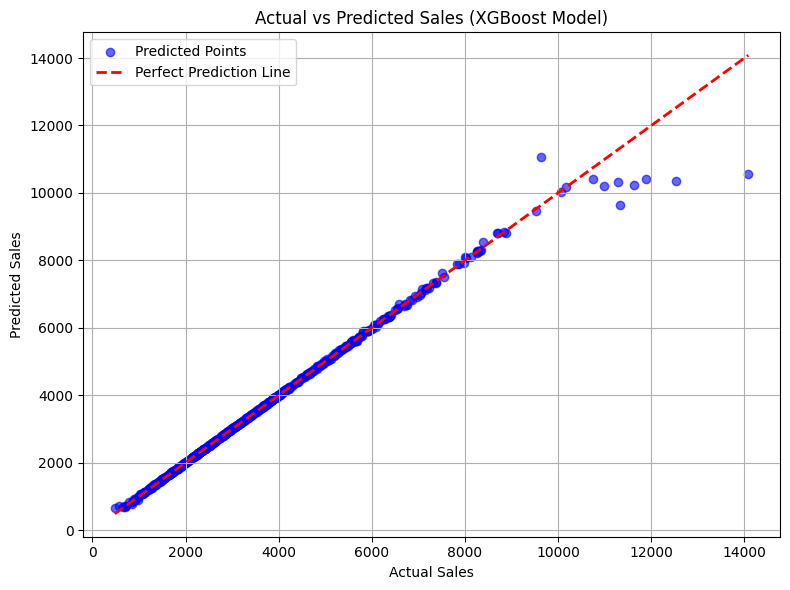

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Convert from log scale back to actual sales
actual_sales = np.expm1(y_test)  # true sales
predicted_sales = np.expm1(predictions['XGBoost'])  # predicted sales

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(actual_sales, predicted_sales, alpha=0.6, color="blue", label="Predicted Points")
plt.plot([actual_sales.min(), actual_sales.max()],
         [actual_sales.min(), actual_sales.max()],
         'r--', lw=2, label="Perfect Prediction Line")

plt.title("Actual vs Predicted Sales (XGBoost Model)")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [34]:
!pip install prophet


In [35]:
import pandas as pd

# Load the dataset
df = pd.read_csv('sales_data_sample.csv', encoding='latin-1') # Or your specific file path and encoding

**Time Series Forecasting for Future Sales **

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7qdppzg0/uos810tc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7qdppzg0/df8v8100.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40506', 'data', 'file=/tmp/tmp7qdppzg0/uos810tc.json', 'init=/tmp/tmp7qdppzg0/df8v8100.json', 'output', 'file=/tmp/tmp7qdppzg0/prophet_model3gnirfgn/prophet_model-20250612132259.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:22:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:22:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


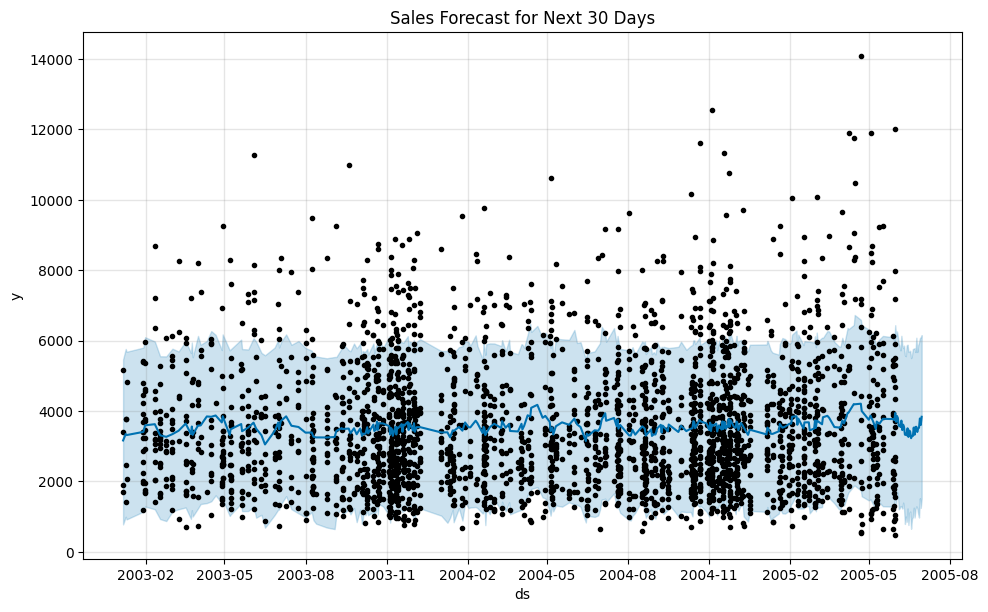

In [36]:
from prophet import Prophet
import matplotlib.pyplot as plt

# Prepare the data
df_prophet = df[['ORDERDATE', 'SALES']].copy()

# Rename columns for Prophet
df_prophet.columns = ['ds', 'y']

# Convert to datetime
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

# Fit Prophet model
model = Prophet()
model.fit(df_prophet)

# Create future dataframe (30 days into future)
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Plot forecast
fig = model.plot(forecast)
plt.title('Sales Forecast for Next 30 Days')
plt.show()


**AI-Based Intelligent Inventory Recommender**

In [37]:
inventory_df = df.groupby('PRODUCTCODE')['SALES'].agg(['mean', 'std']).reset_index()
inventory_df['suggested_inventory'] = inventory_df['mean'] + 1.65 * inventory_df['std']
inventory_df['suggested_inventory'] = inventory_df['suggested_inventory'].round()

inventory_df.head()


,PRODUCTCODE,mean,std,suggested_inventory
0,S10_1678,3734.884615,1596.834302,6370.0
1,S10_1949,6824.036786,2432.432909,10838.0
2,S10_2016,4077.594615,1334.371798,6279.0
3,S10_4698,6553.887308,2376.927037,10476.0
4,S10_4757,4188.656667,1741.380037,7062.0


**Customer Segmentation using K-Means**

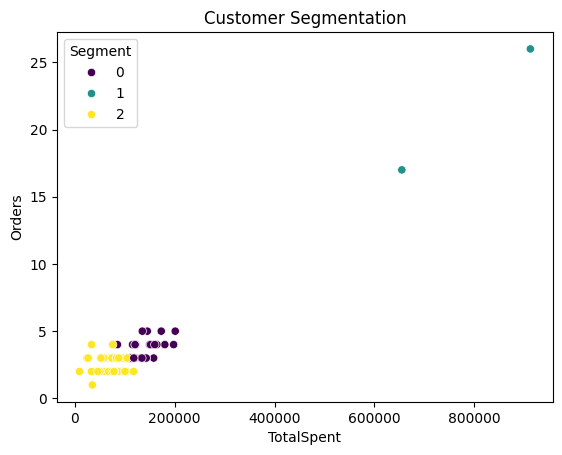

In [38]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

customer_df = df.groupby('CUSTOMERNAME').agg({
    'SALES': 'sum',
    'ORDERNUMBER': 'nunique'
}).reset_index().rename(columns={'SALES': 'TotalSpent', 'ORDERNUMBER': 'Orders'})

scaler = StandardScaler()
X_scaled = scaler.fit_transform(customer_df[['TotalSpent', 'Orders']])

kmeans = KMeans(n_clusters=3)
customer_df['Segment'] = kmeans.fit_predict(X_scaled)

# Visualize
sns.scatterplot(data=customer_df, x='TotalSpent', y='Orders', hue='Segment', palette='viridis')
plt.title("Customer Segmentation")
plt.show()


**Inventory Recommendation **

In [39]:
# Group by product to calculate mean and std of sales
inventory_df = df.groupby('PRODUCTCODE')['SALES'].agg(['mean', 'std']).reset_index()

# Add recommended inventory: mean + 1.65 * std (95% confidence buffer)
inventory_df['recommended_inventory'] = (inventory_df['mean'] + 1.65 * inventory_df['std']).round()

# Rename columns for better understanding
inventory_df.columns = ['Product Code', 'Average Sales', 'Sales Variation', 'Recommended Inventory']

# Display top 10 recommended inventory items
inventory_df.sort_values(by='Recommended Inventory', ascending=False).head(10)


,Product Code,Average Sales,Sales Variation,Recommended Inventory
7,S12_1108,6484.050769,2649.933127,10856.0
1,S10_1949,6824.036786,2432.432909,10838.0
3,S10_4698,6553.887308,2376.927037,10476.0
22,S18_1749,5786.837273,2438.611573,9811.0
6,S12_1099,5487.080400,2301.678372,9285.0
12,S12_3891,5589.693846,2037.317869,8951.0
39,S18_3232,5543.181154,2042.985063,8914.0
25,S18_2238,5726.812963,1912.051093,8882.0
76,S24_3856,5208.403704,2146.446559,8750.0
9,S12_2823,5384.852308,1785.297645,8331.0


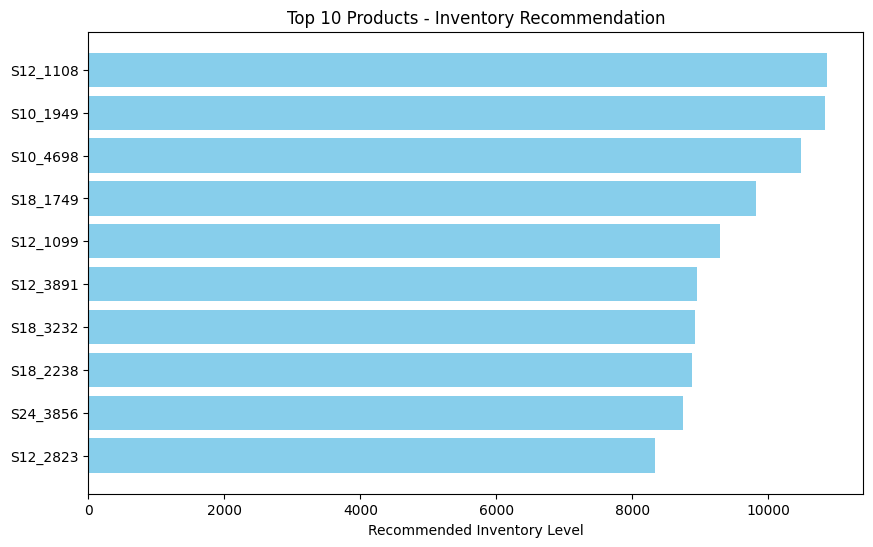

In [40]:
import matplotlib.pyplot as plt

top_products = inventory_df.sort_values(by='Recommended Inventory', ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(top_products['Product Code'], top_products['Recommended Inventory'], color='skyblue')
plt.xlabel("Recommended Inventory Level")
plt.title("Top 10 Products - Inventory Recommendation")
plt.gca().invert_yaxis()
plt.show()


In [41]:
!pip install streamlit pyngrok prophet --quiet



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 3.0 MB/s eta 0:00:00


In [42]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

st.set_page_config(page_title="Sales Forecast & Inventory Recommender", layout="wide")
st.title("📊 AI-Powered Sales Forecasting & Inventory Recommendation System")

uploaded_file = st.file_uploader("Upload your sales CSV", type=['csv'])

if uploaded_file:
    df = pd.read_csv(uploaded_file, encoding='ISO-8859-1')
    st.subheader("📌 Dataset Preview")
    st.dataframe(df.head())

    df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

    # Prophet Forecast
    df_prophet = df[['ORDERDATE', 'SALES']].copy()
    df_prophet.columns = ['ds', 'y']
    model = Prophet()
    model.fit(df_prophet)
    future = model.make_future_dataframe(periods=30)
    forecast = model.predict(future)

    st.subheader("📈 Forecast for Next 30 Days")
    fig1 = model.plot(forecast)
    st.pyplot(fig1)

    # Inventory Recommendation
    st.subheader("📦 Inventory Recommendation")
    inventory_df = df.groupby('PRODUCTCODE')['SALES'].agg(['mean', 'std']).reset_index()
    inventory_df['recommended_inventory'] = (inventory_df['mean'] + 1.65 * inventory_df['std']).round()
    st.dataframe(inventory_df[['PRODUCTCODE', 'recommended_inventory']].sort_values(by='recommended_inventory', ascending=False).head(10))

    # Product Trend
    st.subheader("📉 Product Sales Trend")
    selected_product = st.selectbox("Choose a Product", df['PRODUCTCODE'].unique())
    prod_df = df[df['PRODUCTCODE'] == selected_product].sort_values('ORDERDATE')
    st.line_chart(prod_df.set_index('ORDERDATE')['SALES'])

    st.success("✅ Completed successfully!")


Writing app.py


In [43]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

st.set_page_config(page_title="Sales Forecast & Inventory Recommender", layout="wide")
st.title("📊 AI-Powered Sales Forecasting & Inventory Recommendation System")

uploaded_file = st.file_uploader("Upload your sales CSV", type=['csv'])

if uploaded_file:
    df = pd.read_csv(uploaded_file, encoding='ISO-8859-1')
    st.subheader("📌 Dataset Preview")
    st.dataframe(df.head())

    df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

    # Prophet Forecast
    df_prophet = df[['ORDERDATE', 'SALES']].copy()
    df_prophet.columns = ['ds', 'y']
    model = Prophet()
    model.fit(df_prophet)
    future = model.make_future_dataframe(periods=30)
    forecast = model.predict(future)

    st.subheader("📈 Forecast for Next 30 Days")
    fig1 = model.plot(forecast)
    st.pyplot(fig1)

    # Inventory Recommendation
    st.subheader("📦 Inventory Recommendation")
    inventory_df = df.groupby('PRODUCTCODE')['SALES'].agg(['mean', 'std']).reset_index()
    inventory_df['recommended_inventory'] = (inventory_df['mean'] + 1.65 * inventory_df['std']).round()
    st.dataframe(inventory_df[['PRODUCTCODE', 'recommended_inventory']].sort_values(by='recommended_inventory', ascending=False).head(10))

    # Product Trend
    st.subheader("📉 Product Sales Trend")
    selected_product = st.selectbox("Choose a Product", df['PRODUCTCODE'].unique())
    prod_df = df[df['PRODUCTCODE'] == selected_product].sort_values('ORDERDATE')
    st.line_chart(prod_df.set_index('ORDERDATE')['SALES'])

    st.success("✅ Completed successfully!")


Overwriting app.py


In [44]:
!streamlit run app.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://104.196.124.52:8501

  Stopping...
  Stopping...


In [45]:
!pip install streamlit -q
!pip install pyngrok -q

In [46]:
!ngrok config add-authtoken 2tI8PrCz4ljyXmKVBOF2DK4dA8O_5pbS8qEnuFZ6CqgcBjT4u

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [47]:
!streamlit run app.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://104.196.124.52:8501

  Stopping...
^C


In [48]:
print("Local URL: http://localhost:8501")

Local URL: http://localhost:8501


In [49]:
!ngrok http 8000

Traceback (most recent call last):
  File "/usr/lib/python3.11/subprocess.py", line 1264, in wait
    return self._wait(timeout=timeout)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/subprocess.py", line 2053, in _wait
    (pid, sts) = self._try_wait(0)
                 ^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/subprocess.py", line 2011, in _try_wait
    (pid, sts) = os.waitpid(self.pid, wait_flags)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/bin/ngrok", line 8, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pyngrok/ngrok.py", line 687, in main
    run(sys.argv[1:])
  File "/usr/local/lib/python3.11/dist-packages/pyngrok/ngrok.py", line 675, in run
    process.run_process(pyngrok_config.ngrok_path, args)
  File "/usr/local/lib/python3.11/dist-packages/pyngrok/pro

In [50]:
from pyngrok import ngrok
import os
import time

ngrok.kill()
time.sleep(2)

print("🚀 Launching Streamlit...")
os.system("streamlit run app.py &>/content/logs.txt &")
time.sleep(5)

public_url = ngrok.connect(8501, proto="http")
print(f"✅ Your Loan Dashboard is live at: {public_url}")

🚀 Launching Streamlit...
✅ Your Loan Dashboard is live at: NgrokTunnel: "https://0879-104-196-124-52.ngrok-free.app" -> "http://localhost:8501"


In [51]:
import pandas as pd
# Load the dataset
df = pd.read_csv('/content/sales_data_sample.csv', encoding='ISO-8859-1')